<a href="https://colab.research.google.com/github/gabrielaagu/Data-Science/blob/main/04%20-%20Captura%20de%20datos%20y%20representaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## Ejercicio 3 - Captura de datos y representación (2 ptos)

En este ejercicio haremos uso de la [siguiente página web](https://books.toscrape.com/). Se trata de un catálogo de libros con múltiples categorías. Nuestro objetivo es hacer una captura de datos de una web (o scraping) para almacenarlos y representarlos visualmente.

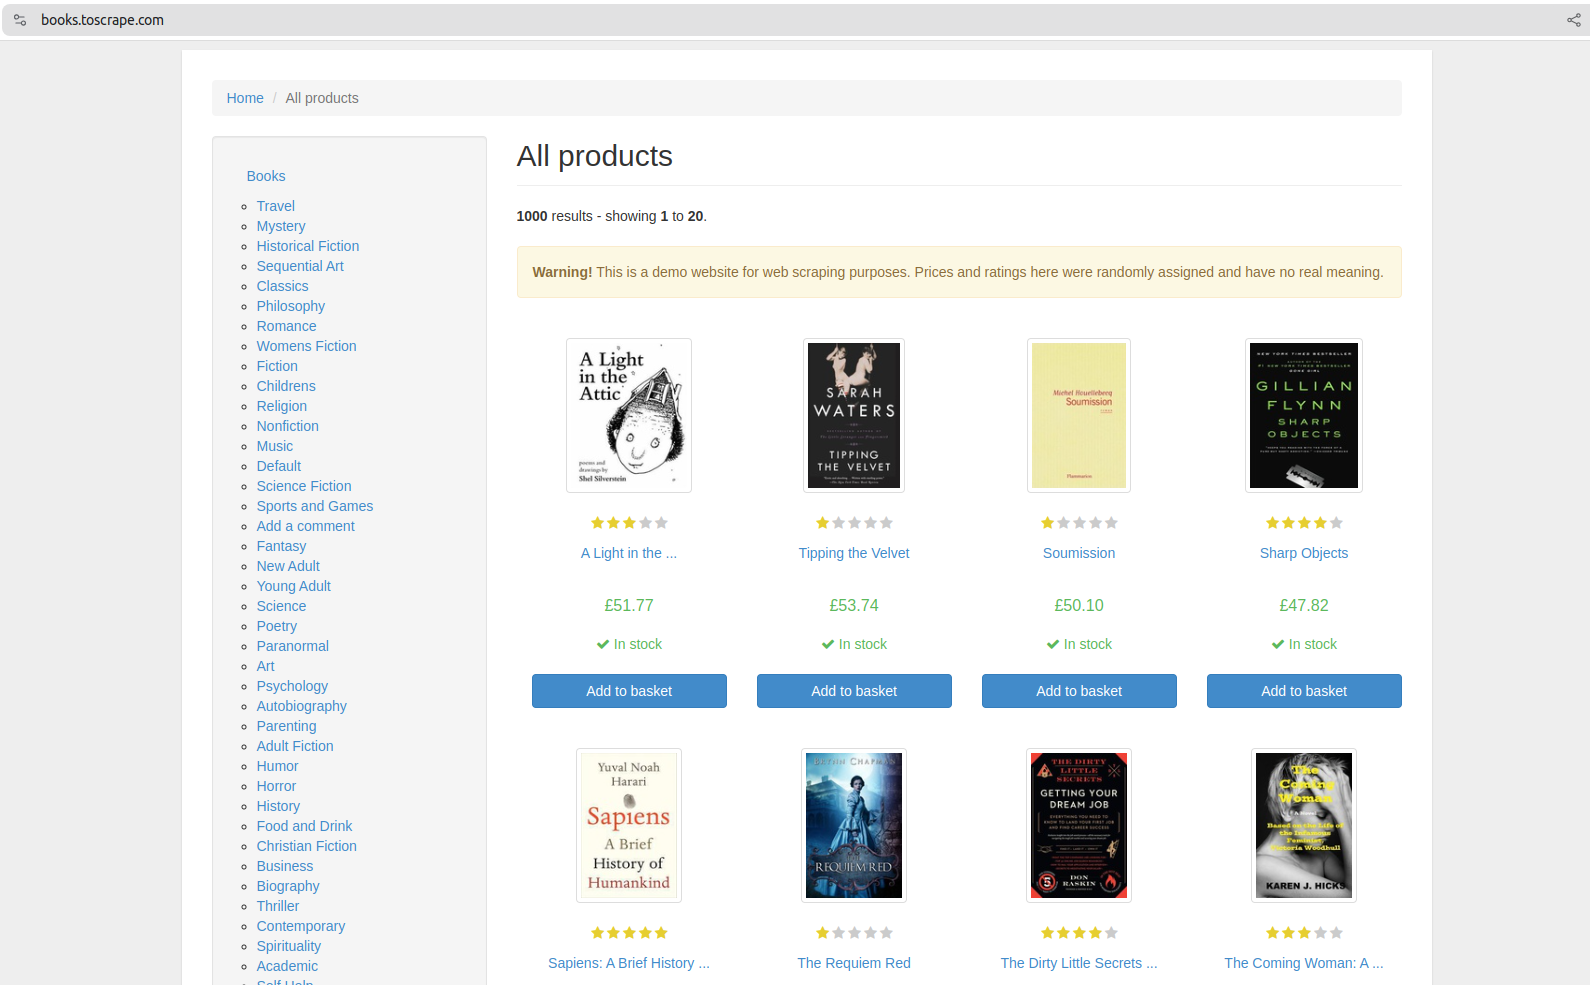

### Parte 1 (0.75 ptos)

Se debe extraer todos todos los libros y guardar los siguientes datos:
* **Nombre completo del libro**
* **La valoración, que puede ser uno de los siguientes valores [One, Two, Three, Four, Five]**
* **La descripción si está disponible, sino N/A**
* **El precio. Nos basta con extraer el precio del libro general, no es necesario extraer el precio incluyendo o sin incluir tasas. Solo se deberá incluir su valor numérico, sin £.**

Los datos se guardarán en un `.csv` bajo el nombre de `libros.csv` donde cada fila corresponderá a un libro.

Podemos hacer uso de la librería [`requests`](https://requests.readthedocs.io/en/latest/) y [`Beautiful Soup`](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) para navegar entre los html. Podemos utilizar la librería de [`Pandas`](https://pandas.pydata.org/pandas-docs/version/1.3/index.html) para elaborar un dataframe que podrá ser guardado en un `.csv`.

In [ ]:
!pip install requests bs4 urllib3==1.26.18

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

# Función para obtener los enlaces de todos los libros
def obtener_enlaces_libros(url_base):
    enlaces_libros = []
    url_pagina = url_base + "catalogue/page-{}.html"
    for pagina in range(1, 51):  # Hay 50 páginas en total
        respuesta = requests.get(url_pagina.format(pagina))
        sopa = BeautifulSoup(respuesta.text, 'html.parser')
        enlaces = sopa.select('article.product_pod h3 a')
        for enlace in enlaces:
            enlaces_libros.append(url_base + 'catalogue/' + enlace['href'].replace('../../../', ''))
    return enlaces_libros

# Función para obtener los detalles de cada libro
def obtener_detalles_libro(url):
    respuesta = requests.get(url)
    sopa = BeautifulSoup(respuesta.text, 'html.parser')

    # Título
    titulo = sopa.h1.text

    # Precio
    precio = sopa.select_one('p.price_color').text
    precio = re.sub(r'[^0-9.]', '', precio)  # Eliminar caracteres no numéricos ni puntos
    precio = float(precio)  # Convertir a float

    # Valoración
    rating = sopa.select_one('p.star-rating')['class'][1]

    # Descripción
    descripcion = sopa.select_one('#product_description ~ p')
    if descripcion:
        descripcion = descripcion.text
    else:
        descripcion = "N/A"

    return {
        'Titulo': titulo,
        'Precio': precio,
        'Valoracion': rating,
        'Descripcion': descripcion
    }

# URL base
url_base = "https://books.toscrape.com/"

# Obtener enlaces de todos los libros
enlaces_libros = obtener_enlaces_libros(url_base)

# Lista para almacenar los datos de los libros
datos_libros = []

# Obtener los detalles de cada libro
for enlace in enlaces_libros:
    detalles = obtener_detalles_libro(enlace)
    datos_libros.append(detalles)

# Crear un DataFrame y guardar en un archivo CSV
df = pd.DataFrame(datos_libros)

# Directorio donde se guardará el archivo CSV
download_dir = '/content/drive/MyDrive/Downloads/'

# Guardar el archivo CSV en el directorio especificado
df.to_csv(f'{download_dir}libros.csv', index=False)

print(f"Datos de los libros guardados en '{download_dir}libros.csv'.")

Datos de los libros guardados en '/content/drive/MyDrive/Downloads/libros.csv'.


### Parte 2 (0.5 ptos)

Utilizando el `.csv` anterior, extraer la columna de precios de todos los libros y elabora un histograma con la distribución de los precios.

Para elaborar el histograma podemos utilizar la librería [`matplotlib`](https://matplotlib.org/stable/index.html), una librería muy utilizada para crear gráficos de manera sencilla y flexible.

In [ ]:
!pip install matplotlib

El histograma resultante será similar al que aparece a continuación:
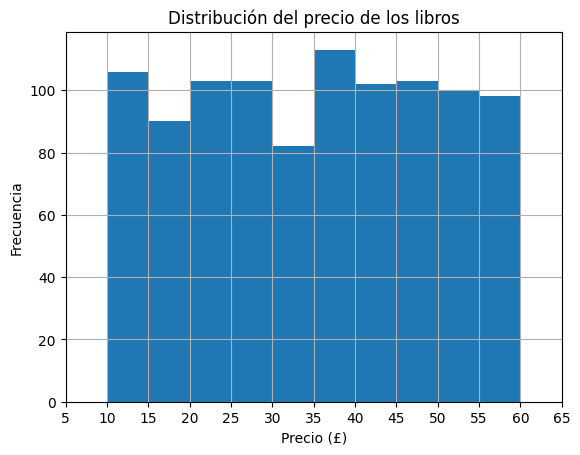

Podemos ver como la distribución del precio va en un **rango de 5 en 5, desde el valor 5 hasta el valor 65 (incluido)**.

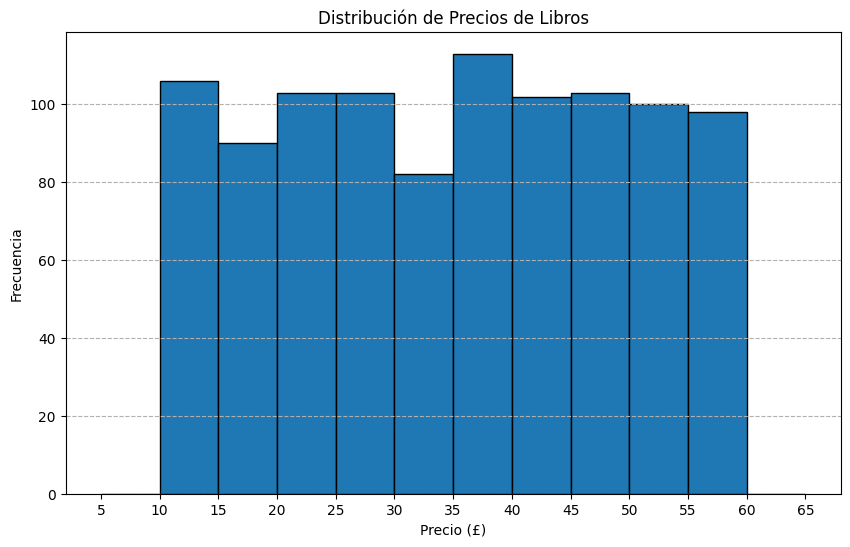

In [ ]:
import matplotlib.pyplot as plt

# Directorio donde se guardó el archivo CSV
download_dir = '/content/drive/MyDrive/Downloads/'
csv_file = f'{download_dir}libros.csv'

# Cargamos el archivo CSV
df = pd.read_csv(csv_file)

# Extraemos la columna de precios
precios = df['Precio']

# Definimos los rangos del histograma
bins = range(5, 70, 5)  # Rango de 5 en 5 desde 5 hasta 65

# Creamos el histograma
plt.figure(figsize=(10, 6))
plt.hist(precios, bins=bins, edgecolor='black')
plt.title('Distribución de Precios de Libros')
plt.xlabel('Precio (£)')
plt.ylabel('Frecuencia')
plt.xticks(bins)
plt.grid(axis='y', linestyle='--')

# Mostrar el histograma
plt.show()

### Parte 3 (0.75 ptos)

Esta parte consistirá en elaborar un histograma que compare la distribución de precios de los libros pertenecientes a las **categorías de romance (*romance*), fantasía (*fantasy*) y de comida y bebida (*food and drink*)**.

La página cuenta con diversas categorías, el objetivo es scrapear todos los libros de las categorías indicadas arriba.

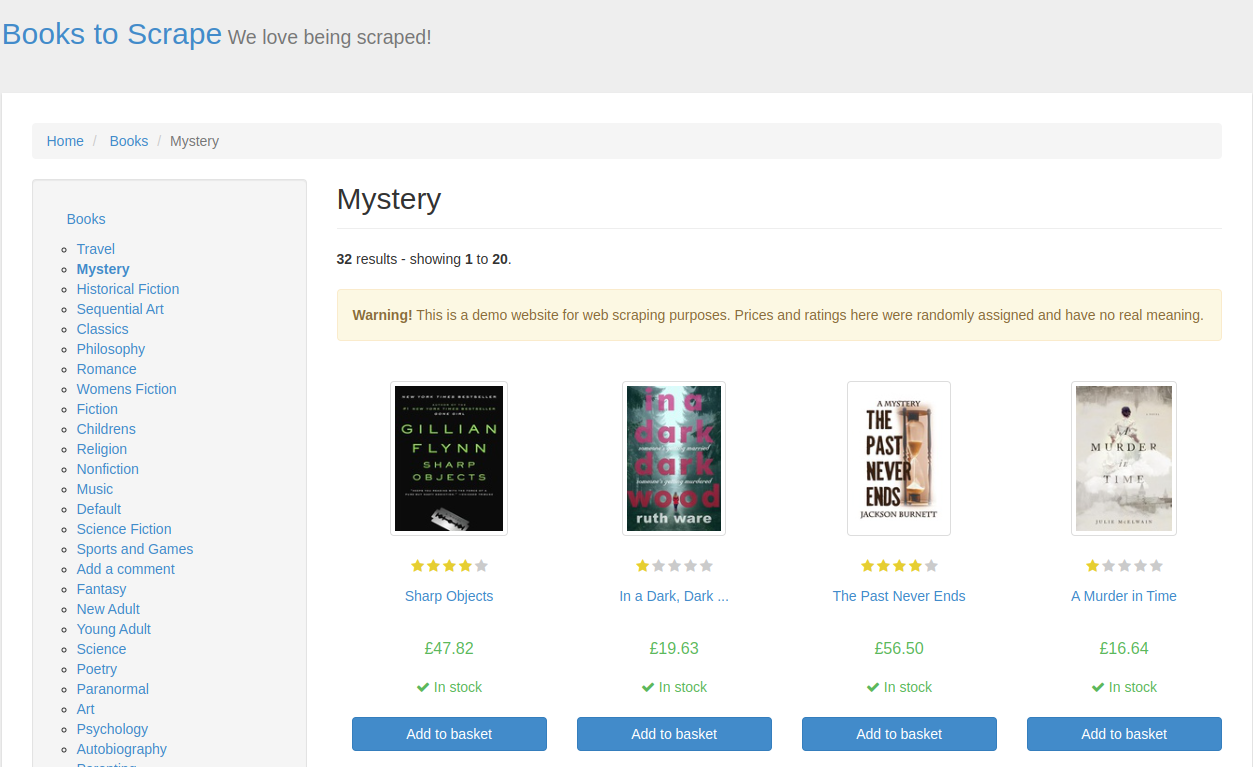

Debe ser un gráfico similar al que se muestra a continuación:

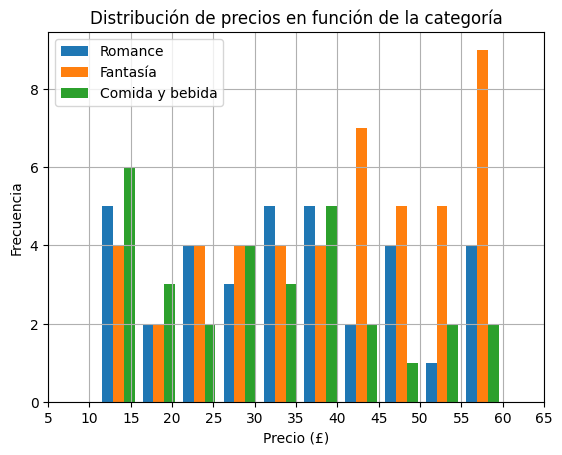

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import numpy as np

# Función para obtener los enlaces de las categorías específicas
def obtener_enlaces_categorias(url_base):
    categorias_especificas = ["romance", "fantasy", "food-and-drink"]
    enlaces_categorias = []

    respuesta = requests.get(url_base)
    sopa = BeautifulSoup(respuesta.text, 'html.parser')
    enlaces = sopa.select('ul.nav-list li ul li a')

    for enlace in enlaces:
        categoria_url = enlace['href']
        if any(categoria in categoria_url for categoria in categorias_especificas):
            enlaces_categorias.append((url_base + categoria_url, enlace.text.strip()))
    return enlaces_categorias

# Función para obtener los enlaces de todos los libros de una categoría
def obtener_enlaces_libros_categoria(url_categoria):
    enlaces_libros = []
    url_pagina = url_categoria.replace('index.html', 'page-{}.html')
    pagina = 1
    while True:
        respuesta = requests.get(url_pagina.format(pagina))
        sopa = BeautifulSoup(respuesta.text, 'html.parser')
        libros = sopa.select('article.product_pod h3 a')
        if not libros:
            break
        for libro in libros:
            enlaces_libros.append(url_categoria.replace('index.html', '') + libro['href'])
        pagina += 1
    return enlaces_libros

# Función para obtener los detalles de cada libro
def obtener_detalles_libro(url, categoria):
    respuesta = requests.get(url)
    sopa = BeautifulSoup(respuesta.text, 'html.parser')

    # Título
    titulo = sopa.h1.text

    # Precio
    precio = sopa.select_one('p.price_color').text
    precio = re.sub(r'[^0-9.]', '', precio)  # Eliminar caracteres no numéricos ni puntos
    precio = float(precio)  # Convertir a float

    return {
        'Titulo': titulo,
        'Precio': precio,
        'Categoria': categoria
    }

# URL base
url_base = "https://books.toscrape.com/"

# Obtener enlaces de las categorías específicas
enlaces_categorias = obtener_enlaces_categorias(url_base)

# Lista para almacenar los datos de los libros
datos_libros = []

# Obtenemos los enlaces de los libros y los detalles de cada libro de las categorías específicas
for enlace_categoria, categoria in enlaces_categorias:
    enlaces_libros = obtener_enlaces_libros_categoria(enlace_categoria)
    for enlace_libro in enlaces_libros:
        detalles = obtener_detalles_libro(enlace_libro, categoria)
        datos_libros.append(detalles)

# Creamos un DataFrame y guardar en un archivo CSV
df2 = pd.DataFrame(datos_libros)

# Extraemos la columna de precios
precios = df2['Precio']

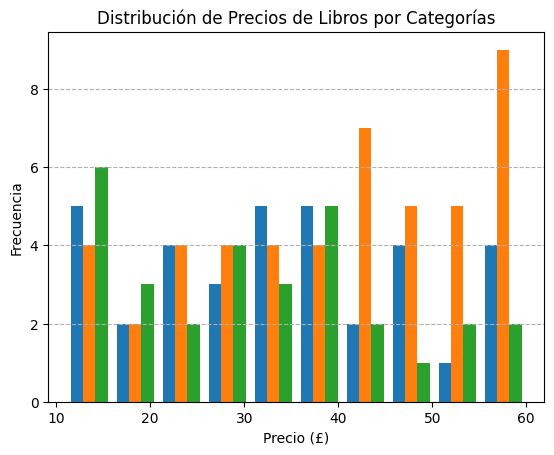

In [ ]:
# Filtrar por categorías y obtener las listas de precios
precios_romance = df2[df2['Categoria'] == 'Romance']['Precio'].tolist()
precios_fantasy = df2[df2['Categoria'] == 'Fantasy']['Precio'].tolist()
precios_food_and_drink = df2[df2['Categoria'] == 'Food and Drink']['Precio'].tolist()

# Histograma
fig, ax = plt.subplots()
plt.hist([precios_romance, precios_fantasy, precios_food_and_drink])

# Añadir etiquetas y título
plt.xlabel('Precio (£)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios de Libros por Categorías')
plt.grid(axis='y', linestyle='--')

plt.show()

## Ejercicio 4 - Acceso a datos abiertos por API (2 ptos)

Para este ejercicio se utilizará la web de [datos.gob.es](https://datos.gob.es/es/).

*Datos abiertos del Gobierno de España* se trata de una plataforma que facilita el acceso a datos abiertos del sector público en España, fomentando la transparencia, la innovación y el desarrollo de soluciones basadas en datos para beneficio de la sociedad en general.

Cuenta con su propia API, cuya documentación podemos encontrar en este [enlace](https://datos.gob.es/es/apidata)

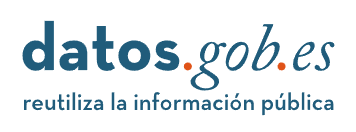

### Parte 1 (0.5 ptos)

Usando la API pública se pide obtener **todas las opciones de cobertura geográfica que tengan conjuntos de datos en el catálogo** y descargarlo en **formato `.csv`** bajo el nombre de **`cobertura_geografica.csv`**.

La cobertura geográfica se refiere a las áreas geográficas a las que se aplican los datos, ya sea a nivel nacional, regional o local.


Si la librería `requests` no funciona correctamente y arroja un error de *certificado SSL no válido*, se puede solucionar haciendo downgrade de la versión de `urllib3`.

In [ ]:
!pip install -U urllib3==1.23

In [ ]:
import requests
import pandas as pd
import json

# URL de la API para obtener todas las opciones de cobertura geográfica
url = "https://datos.gob.es/apidata/catalog/spatial"

# Realizar la solicitud GET a la API
response = requests.get(url)
data = response.json()

# Extraemos y verificamos la información relevante
geographic_coverage_list = []

# Verificamos la estructura del primer elemento
if 'result' in data and 'items' in data['result']:
    for item in data['result']['items']:
        geographic_coverage_list.append({
            'URI': item.get('_about'),
            'Label': item.get('label'),
            'Pais': item.get('pais'),
            'SameAs': item.get('sameAs'),
            'Type': item.get('type')
        })
else:
    print("Estructura de datos inesperada.")

# Procedemos a exportarlos a CSV
df3 = pd.DataFrame(geographic_coverage_list)
df3.to_csv('cobertura_geografica.csv', index=False)
print("Datos guardados en cobertura_geografica.csv")


Datos guardados en cobertura_geografica.csv


### Parte 2 (1 pto)

De la **comunidad autónoma de Cataluña** se pide obtener los **1000 primeros resultados filtrados por fecha de modificación (de más a menos reciente)** y elaborar un gráfico de barras donde la variable X sean las diferentes categorías (temas o *themes*) y la variable Y sea el número de apariciones en los resultados.

**Puede haber un documentos que tenga varios temas, en este caso debería incluirse la aparición en ambos temas.**

Podemos utilizar una librería como la de `matplotlib`para elaborar dicho gráfico de barras.

El gráfico de barras debería ser **similar** al siguiente:

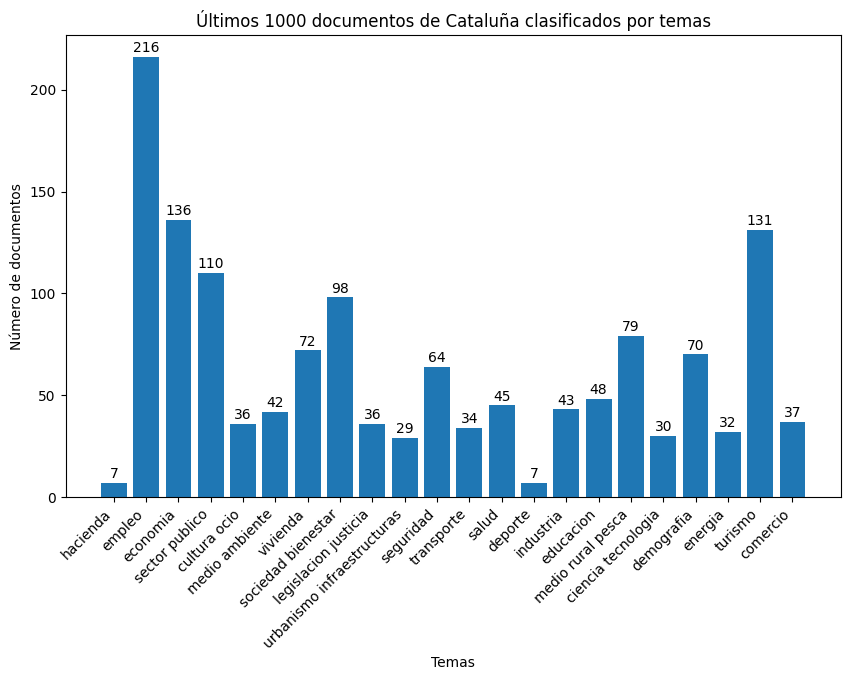

Si le pedimos a la API que nos devuelva la información en un formato JSON, veremos que en cada documento encontramos una propiedad especfícia acerca de la categoría. Los temas normalmente se encuentran representados como una URL, se pide representarlos de una forma más clara, similar al gráfico de barras.

Para mayor legibilidad, se ha especificado la siguiente escala dentro de `matplotlib` (`figsize=(10,6)`) y los `ticks` de la dimensión X se han rotado 45 grados. Además, se ha añadido el número de documentos encima de cada barra

https://datos.gob.es/apidata/catalog/dataset/spatial/Autonomia/Cataluna.json?_sort=-modified&_page=0&_pageSize=50
Número de elementos: 50
https://datos.gob.es/apidata/catalog/dataset/spatial/Autonomia/Cataluna.json?_sort=-modified&_page=1&_pageSize=50
Número de elementos: 100
https://datos.gob.es/apidata/catalog/dataset/spatial/Autonomia/Cataluna.json?_sort=-modified&_page=2&_pageSize=50
Número de elementos: 150
https://datos.gob.es/apidata/catalog/dataset/spatial/Autonomia/Cataluna.json?_sort=-modified&_page=3&_pageSize=50
Número de elementos: 200
https://datos.gob.es/apidata/catalog/dataset/spatial/Autonomia/Cataluna.json?_sort=-modified&_page=4&_pageSize=50
Número de elementos: 250
https://datos.gob.es/apidata/catalog/dataset/spatial/Autonomia/Cataluna.json?_sort=-modified&_page=5&_pageSize=50
Número de elementos: 300
https://datos.gob.es/apidata/catalog/dataset/spatial/Autonomia/Cataluna.json?_sort=-modified&_page=6&_pageSize=50
Número de elementos: 350
https://datos.gob.es/apidata

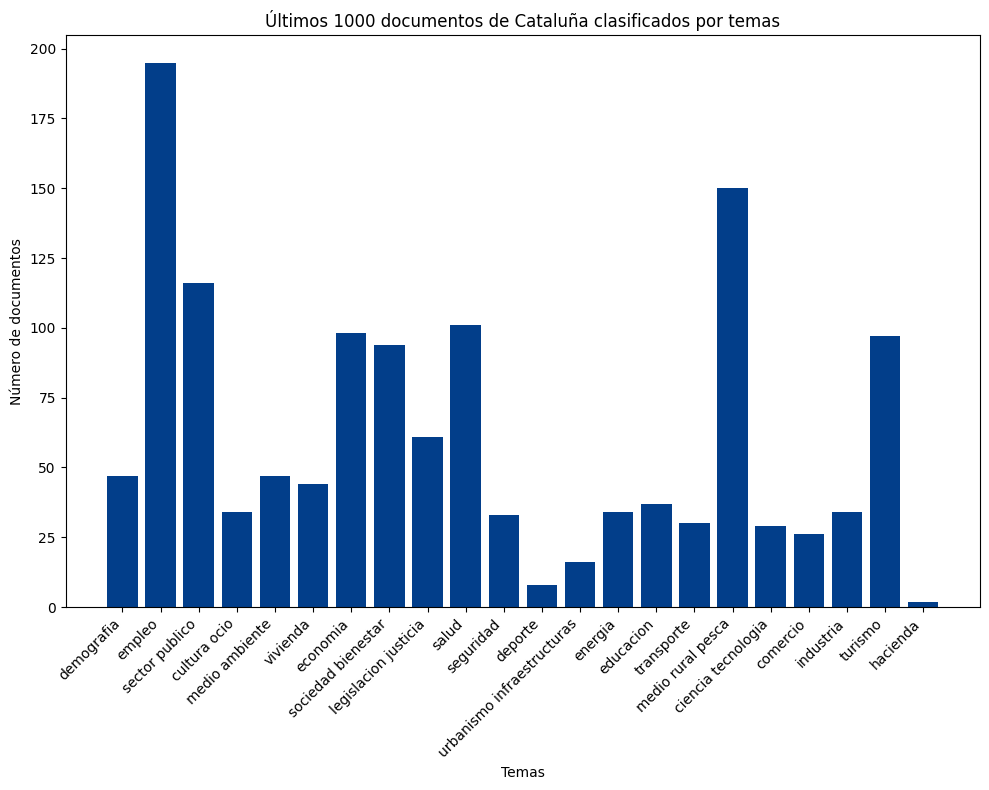

In [ ]:
import json
import requests
from collections import Counter

#Ultimos 1000 resultados
result_number = 1000
url_base = 'https://datos.gob.es/apidata/catalog/dataset/spatial/Autonomia/Cataluna.json'

#Procesamos una página de datos, extrayendo elementos hasta llenar data_list a 1000
def process_page(url, data_list):
    print(url)
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        items = data['result']['items']
        for item in items:
            if len(data_list) < result_number:
                data_list.append(item)
            else:
                return False  # Detiene la ejecución si se alcanza el número deseado
    else:
        print("Error en la solicitud:", response.status_code)
        return False  # Retorna False si hay un error de solicitud
    return True  # Retorna True si la página se procesó correctamente y aún no se llega a 1000

#Extrae y formatea temas de la lista de datos
def extract_themes(data_list):
    themes = []
    for dataset in data_list:
        if 'theme' in dataset:
            theme_urls = dataset['theme']
            if isinstance(theme_urls, str):
                theme_urls = [theme_urls]  # Trata un tema único como una lista
            for url in theme_urls:
                last_part = url.split('/')[-1]
                formatted_theme = last_part.replace('-', ' ')
                themes.append(formatted_theme)
    return themes

#Visualizamos los temas usando un gráfico de barras.
def visualize_theme_counts(themes):
    theme_counts = Counter(themes)
    df = pd.DataFrame(list(theme_counts.items()), columns=['Tema', 'Apariciones'])
    plt.figure(figsize=(10, 8))
    plt.bar(df['Tema'], df['Apariciones'], color='#023E8A')
    plt.xlabel('Temas')
    plt.ylabel('Número de documentos')
    plt.title('Últimos 1000 documentos de Cataluña clasificados por temas')
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Coleccionamos datos hasta alcanzar 1000 elementos o hasta que no haya más páginas
spatial_data = []
current_page = 0  # La página inicial debe ser 0 si la primera página es 0
while process_page(f'{url_base}?_sort=-modified&_page={current_page}&_pageSize=50', spatial_data) and len(spatial_data) < result_number:
    current_page += 1
    print(f'Número de elementos: {len(spatial_data)}')

# Extraemos temas y visualizamos los conteos
themes = extract_themes(spatial_data)
visualize_theme_counts(themes)


### Parte 3 (0.5 ptos)

Representa la misma información en un gráfico de pastel, donde aparecerán los 6 resultados más relevantes (por número de aparición), los demás resultados irán en la categoría 'otros'.

Debería quedar algo **similar** al siguiente gráfico, con datos porcentuales:

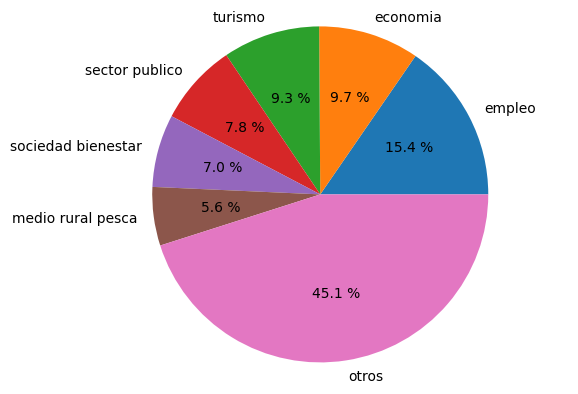

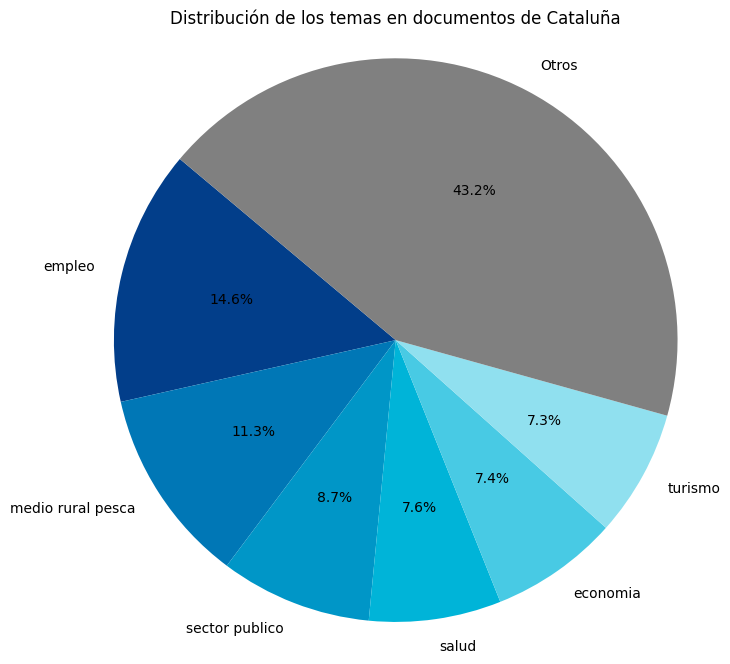

In [ ]:
#Visualizamos los temas usando un gráfico de pastel
def visualize_theme_counts_pie(themes):
    theme_counts = Counter(themes)
    # Convertimos el conteo en un DataFrame y ordenarlo
    df = pd.DataFrame(list(theme_counts.items()), columns=['Tema', 'Apariciones']).sort_values(by='Apariciones', ascending=False)

    # Seleccionamos los 6 temas más frecuentes y sumamos todos los otros en una categoría 'Otros'
    if len(df) > 6:
        top_themes = df.iloc[:6]
        others = pd.DataFrame(data = {
            'Tema': ['Otros'],
            'Apariciones': [df.iloc[6:].Apariciones.sum()]
        })
        final_df = pd.concat([top_themes, others])
    else:
        final_df = df

    # Creamos el gráfico de pastel
    plt.figure(figsize=(8, 8))
    plt.pie(final_df['Apariciones'], labels=final_df['Tema'], autopct='%1.1f%%', startangle=140, colors=['#023E8A', '#0077B6', '#0096C7', '#00B4D8', '#48CAE4', '#90E0EF', 'grey'])
    plt.title('Distribución de los temas en documentos de Cataluña')
    plt.axis('equal')
    plt.show()

themes = extract_themes(spatial_data)
visualize_theme_counts_pie(themes)


## Ejercicio 5 - Proyecto libre con datos abiertos (3 ptos)


Para esta tarea debes seleccionar un conjunto de datos abiertos de tu elección (idealmente deben ser datos de un área geográfica cercana a tu ubicación). Se puede seleccionar el conjunto del portal de datos abiertos de tu ayuntamiento/comunidad, de la página de [datos.gob.es](https://datos.gob.es/es/) o de cualquier **fuente de datos abiertos**.

Pueden usarse e integrarse más de un conjunto de datos abiertos (se valorará positivamente)!

Los datos no tienen porque obtenerse de una API, podemos trabajar directamente con un `.csv` o con un `.json`.

Se tendrá que elaborar un informe (en este mismo notebook) que recoja los siguientes apartados:

**1. Selección del conjunto de datos:**

Describe el conjunto de datos seleccionado, asegurándote que contenga información suficiente para poder hacer un análisis significativo. Comenta los siguientes apartados:

* El conjunto de datos que se va a tratar: Datos de precios de venta y alquiler de todos los distritos del municipio Alicante.

* Motivo para seleccionar el conjunto de datos: Me he propuesto comprar 5 pisos en 5 años con mi pareja, y como necesito saber si los pisos que voy a visitar estan baratos o caros, he decidido analizar los datos de venta y alquiler por![results.png](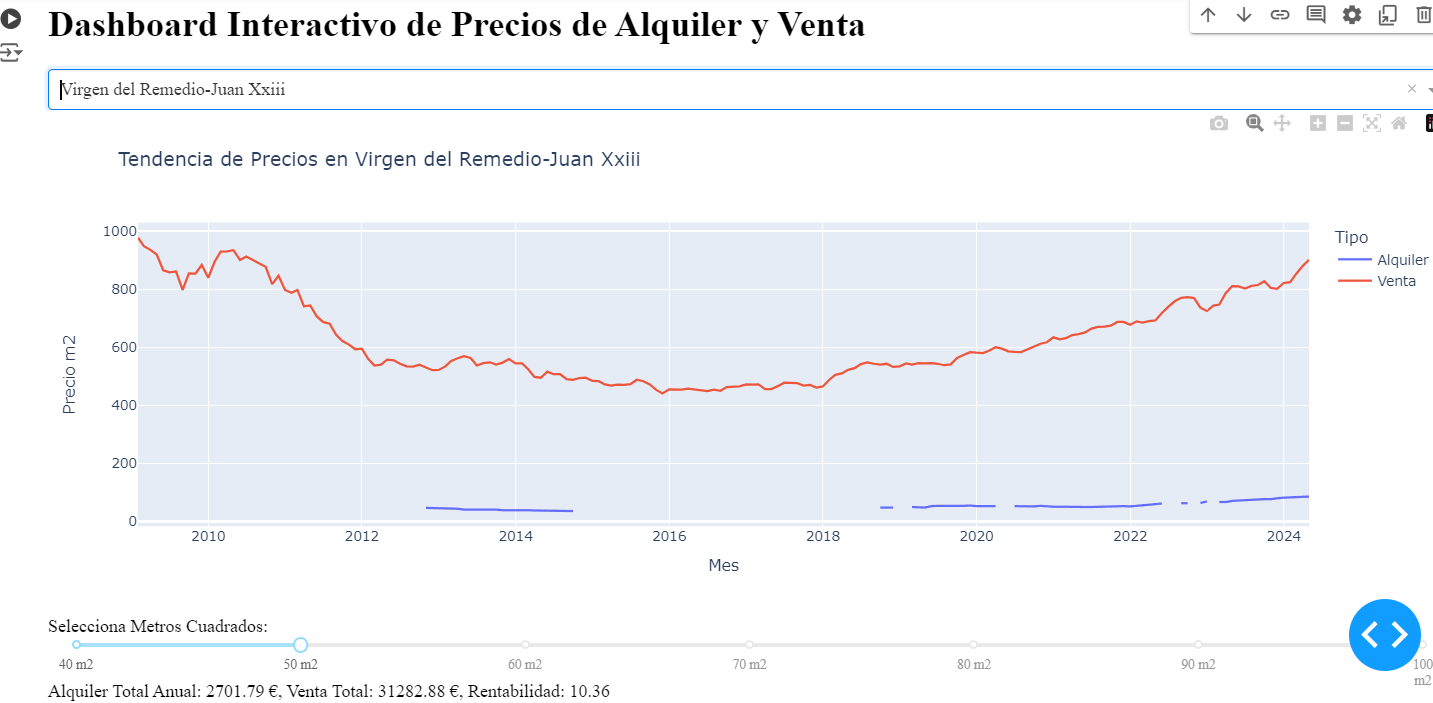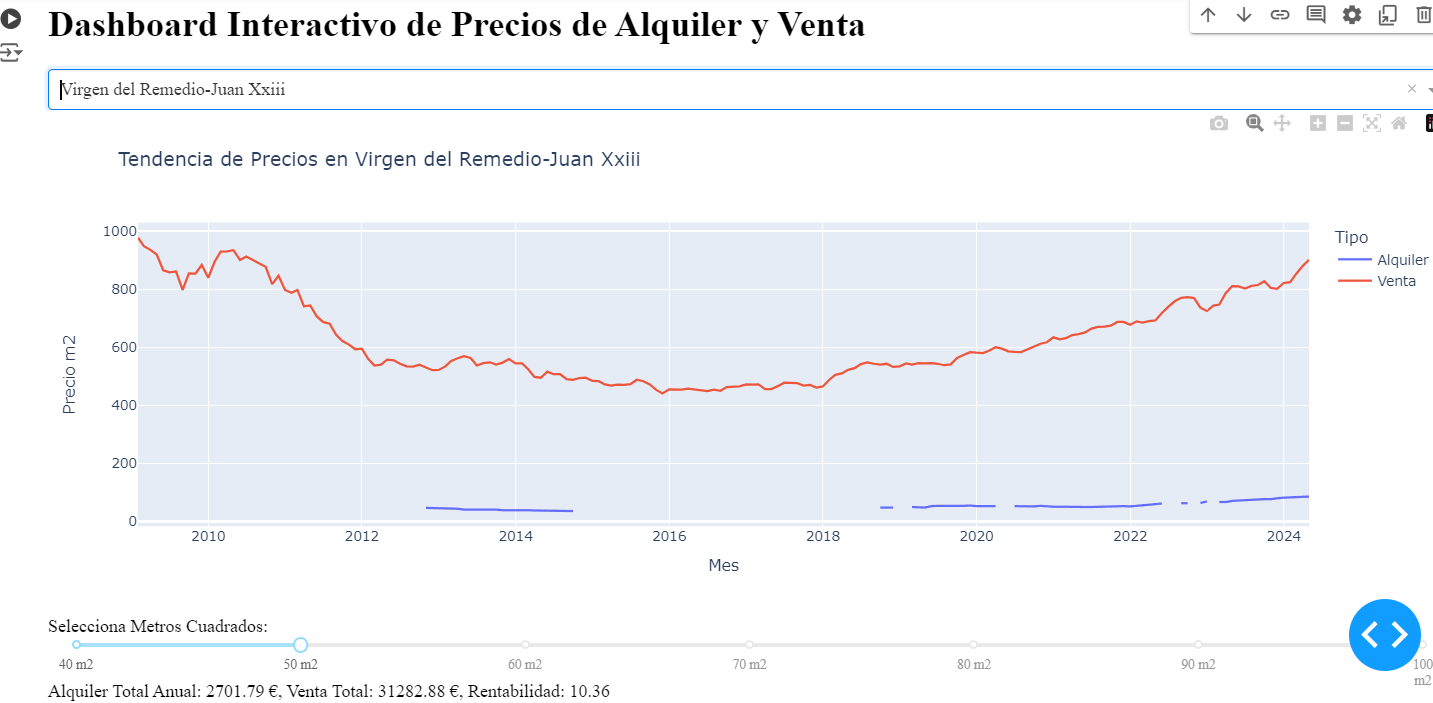) m2 de la web de idealista.

* La fuente (url) usada para obtener los datos:
https://www.idealista.com/sala-de-prensa/informes-precio-vivienda/

* El formato del conjunto de datos
He descargado exceles de venta y de alquiler para todos los distritos de Alicante y saber de acuerdo a los precios de venta y de alquiler en que zonas me interesa invertir, teniendo en cuenta que quiero alcanzar una rentabilidad bruta del 10%.

* La dimensión del conjunto de datos: 20 exceles guardados en una carpeta que se llama "Precios_Alicante" que serán combinados con un script para hacer el análisis.

* Qué se desea analizar o explorar en estos datos: Concer la rentabilidad de los inmuebles por zonas y saber que pisos debo descartar en caso de que estén sobrevalorados, es un factor a tener en cuenta por si surge la necesidad de vender en un futuro.
Adicionalmente, residimos en Madrid y tendríamos que viajar un día en especifico para ir a ver varios pisos, ir a ver solo las mejores opciones sería lo óptimo.

* Posibles limitaciones o sesgos en los datos que deban tenerse en cuenta durante el análisis:
Idealista hace agrupacion de varios distritos en una sola categoria y lo mejor sería saber los precios por distrito e incluso barrios de forma desagregada. Estos son los datos históricos con los que contamos así que tendremos que trabajar con ellos.

**2. Exploración de los datos:**

* Incluye el código necesario para cargar y preprocesar los datos.
* Explora las diferentes variables incluidas en el conjunto de datos.
* Elabora gráficas que faciliten la comprensión de los datos.
* Si es posible, trata de identificar tendencias o patrones interesantes en los datos.

En este apartado puedes incluir código Python así como las explicaciones que consideres oportunas.

**3. Conclusiones y valoraciones finales:**

Elabora un resumen breve con tus valoraciones finales basándote en la exploración de datos realizada.


**¿Qué se va a valorar?**
* Complejidad de los datos usados.
* Originalidad de la propuesta.
* Calidad de la exploración de los datos (gráficas, tendencias observadas, conclusiones, etc)
* Claridad del informe.
* El uso y la integración de más de un conjunto de datos abiertos se valorará positivamente.




In [ ]:
#Primero cargamos los datos y los combinamos.
import pandas as pd
import glob

# Ruta a la carpeta que contiene los archivos de Excel
folder_path = '/content/Precios_Alicante/*.xlsx'

# Lista para almacenar los DataFrames de cada archivo
dataframes = []

# Lee cada archivo de Excel en la carpeta
for file_path in glob.glob(folder_path):
    df = pd.read_excel(file_path)
    dataframes.append(df)

# Combina todos los DataFrames en uno solo
combined_df = pd.concat(dataframes, ignore_index=True)

# Muestra las primeras filas del DataFrame combinado
print(combined_df.head())

# Guarda el DataFrame combinado en un nuevo archivo Excel
combined_df.to_excel('/content/combined_data.xlsx', index=False)


         Mes Precio m2 Variación mensual Variación trimestral Variación anual  \
0 2024-02-01  9,9 €/m2             0.012                0.061            n.d.   
1 2024-01-01  9,8 €/m2             0.034                0.048            n.d.   
2 2023-12-01  9,4 €/m2             0.014                0.009            n.d.   
3 2023-11-01  9,3 €/m2            -0.001               -0.021            n.d.   
4 2023-10-01  9,3 €/m2            -0.005                0.031            n.d.   

  Provincia Municipio      Distrito      Tipo  
0  Alicante  Alicante  San Blas-Pau  Alquiler  
1  Alicante  Alicante  San Blas-Pau  Alquiler  
2  Alicante  Alicante  San Blas-Pau  Alquiler  
3  Alicante  Alicante  San Blas-Pau  Alquiler  
4  Alicante  Alicante  San Blas-Pau  Alquiler  


In [ ]:
import numpy as np

# Limpiar y transformar los datos

# Convertir la columna 'Mes' a tipo datetime
combined_df['Mes'] = pd.to_datetime(combined_df['Mes'], format='%b-%y')

# Reemplazar "n.d." por NaN
combined_df['Precio m2'] = combined_df['Precio m2'].replace('n.d.', np.nan)

# Limpiar la columna 'Precio m2' y convertirla a tipo float
combined_df['Precio m2'] = combined_df['Precio m2'].str.extract(r'(\d+[\d,.]*)')[0].str.replace('.', '').str.replace(',', '').astype(float)

# Asegurar que las columnas 'Provincia', 'Municipio', 'Distrito' y 'Tipo' sean tipo texto
combined_df['Provincia'] = combined_df['Provincia'].astype(str)
combined_df['Municipio'] = combined_df['Municipio'].astype(str)
combined_df['Distrito'] = combined_df['Distrito'].astype(str)
combined_df['Tipo'] = combined_df['Tipo'].astype(str)

# Muestra las primeras filas del DataFrame limpio
print(combined_df.head(10))

combined_df.to_excel('/content/combined_data2.xlsx', index=False)

         Mes  Precio m2 Variación mensual Variación trimestral  \
0 2024-02-01       99.0             0.012                0.061   
1 2024-01-01       98.0             0.034                0.048   
2 2023-12-01       94.0             0.014                0.009   
3 2023-11-01       93.0            -0.001               -0.021   
4 2023-10-01       93.0            -0.005                0.031   
5 2023-09-01       93.0            -0.016                0.069   
6 2023-08-01       95.0             0.052               -0.001   
7 2023-07-01       90.0             0.032               -0.038   
8 2023-06-01       87.0            -0.079               -0.016   
9 2023-05-01       95.0             0.013                 n.d.   

  Variación anual Provincia Municipio      Distrito      Tipo  
0            n.d.  Alicante  Alicante  San Blas-Pau  Alquiler  
1            n.d.  Alicante  Alicante  San Blas-Pau  Alquiler  
2            n.d.  Alicante  Alicante  San Blas-Pau  Alquiler  
3            n.d.

In [ ]:
!pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 18.6 MB/s eta 0:00:00


In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Convertir 'Mes' a tipo datetime
combined_df['Mes'] = pd.to_datetime(combined_df['Mes'])

# Crear la aplicación Dash
app = dash.Dash(__name__)

# Layout de la aplicación
app.layout = html.Div([
    html.H1("Dashboard Interactivo de Precios de Alquiler y Venta"),
    dcc.Dropdown(
        id='distrito-filter',
        options=[{'label': distrito, 'value': distrito} for distrito in combined_df['Distrito'].unique()],
        value=combined_df['Distrito'].unique()[0],
        multi=False
    ),
    dcc.Graph(id='price-trend'),
    html.Label('Selecciona Metros Cuadrados:'),
    dcc.Slider(
        id='size-slider',
        min=40,
        max=100,
        step=10,
        marks={i: f'{i} m2' for i in range(40, 101, 10)},
        value=50
    ),
    html.Div(id='rentabilidad-info')
])

# Callback para actualizar el gráfico de tendencia
@app.callback(
    Output('price-trend', 'figure'),
    [Input('distrito-filter', 'value')]
)
def update_graph(selected_distrito):
    filtered_df = combined_df[combined_df['Distrito'] == selected_distrito]
    fig = px.line(filtered_df, x='Mes', y='Precio m2', color='Tipo', title=f'Tendencia de Precios en {selected_distrito}')
    return fig

# Callback para calcular y mostrar la rentabilidad
@app.callback(
    Output('rentabilidad-info', 'children'),
    [Input('size-slider', 'value'),
     Input('distrito-filter', 'value')]
)
def update_rentabilidad(selected_size, selected_distrito):
    filtered_df = combined_df[combined_df['Distrito'] == selected_distrito]
    precio_medio_alquiler = filtered_df[filtered_df['Tipo'] == 'Alquiler']['Precio m2'].mean()
    precio_medio_venta = filtered_df[filtered_df['Tipo'] == 'Venta']['Precio m2'].mean()
    alquiler = precio_medio_alquiler * selected_size
    venta = precio_medio_venta * selected_size
    rentabilidad = ((alquiler * 12) / venta) * 10
    return f'Alquiler Total Anual: {alquiler:.2f} €, Venta Total: {venta:.2f} €, Rentabilidad: {rentabilidad:.2f}'

# Ejecutar la aplicación
if __name__ == '__main__':
    app.run_server(debug=True)


<ipython-input-16-a011b2153044>:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-16-a011b2153044>:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


<IPython.core.display.Javascript object>

**Resumen de Resultados:**

En la exploración de los datos de venta y alquiler de las diversas zonas de Alicante, hemos obtenido resultados significativos que ayudan a identificar oportunidades de inversión inmobiliaria. Uno de los hallazgos más relevantes es que el distrito Virgen del Remedio-Juan XXIII presenta una rentabilidad bruta del 10.36%, posicionándose como una zona potencialmente atractiva para iniciar inversiones.



**Valoraciones Finales:**

Rentabilidad Bruta:

La rentabilidad bruta del 10.36% en el distrito Virgen del Remedio-Juan XXIII indica un alto potencial de retorno sobre la inversión en esta área. Este resultado es crucial para los inversores que buscan maximizar sus ganancias en el mercado inmobiliario de Alicante.

Consideraciones Adicionales:

1. Ratios de Ocupación Ilegal: Es esencial investigar los ratios de ocupación ilegal en el distrito para comprender mejor los riesgos asociados. La ocupación ilegal puede afectar la estabilidad y el valor de la inversión.

2. Índice de Criminalidad: Evaluar el índice de criminalidad es igualmente importante para asegurar que la inversión se realice en un área segura, lo que también impacta en la atractividad para futuros inquilinos o compradores.

Costos Adicionales para poder determinar la rentabilidad neta:

1. Precio Medio de Reformas: Consultar el precio medio de las reformas de empresas locales ayudará a estimar los costos adicionales necesarios para poner la propiedad en condiciones óptimas para alquiler o venta.

2. Impuesto de Transmisiones Patrimoniales (ITP) y Gastos Notariales: Estos costos, específicos de la Comunidad Valenciana, son determinantes para calcular la rentabilidad neta. Considerar estos gastos asegurará una evaluación financiera más precisa y realista.

**Acciones Siguientes:**

**Recolección de Datos Adicionales:**

Antes de tomar decisiones de inversión, es recomendable buscar datos sobre ocupación ilegal y criminalidad específicos a las calles del distrito Virgen del Remedio-Juan XXIII.

Evaluación de Costos de Reforma: Obtener presupuestos de reformas de empresas locales y considerar los gastos adicionales (ITP, notariales,  IBI, comunidad).

Visitas a Propiedades: Una vez recopilada toda la información y evaluados los costos, proceder con la búsqueda y visitas a las propiedades potenciales.

Este análisis y las valoraciones proporcionadas brindan una base sólida para tomar decisiones informadas sobre inversiones inmobiliarias en Alicante, específicamente en el distrito Virgen del Remedio-Juan XXIII. Continuar con la recolección de datos adicionales y la evaluación de costos asegurará una inversión segura y rentable.